## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].value_counts().head()

g989    13
y793    10
l700    10
k894    10
j119    10
Name: Mouse ID, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duple_mouse = combined_df.set_index("Mouse ID")
mouse_time = duple_mouse.loc["g989", "Timepoint"]
print(mouse_time)


Mouse ID
g989     0
g989     0
g989     5
g989     5
g989    10
g989    10
g989    15
g989    15
g989    20
g989    20
g989    25
g989    30
g989    35
Name: Timepoint, dtype: int64


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
multi_mouse = combined_df.set_index("Mouse ID")
bad_mouse = multi_mouse.loc["g989", :]
print(bad_mouse)


         Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                           
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         25   
g989         Propriva  Female          21          26         30   
g989         Propriva  Female          21       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df.sort_values("Mouse ID")
combined_df.drop_duplicates("Mouse ID", keep="first")
print(combined_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [ ]:
# Checking the number of mice in the clean DataFrame.
num_mice = combined_df.agg({"Mouse ID": "nunique"})
num_mice.head()

Mouse ID    249
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_tumor_df = pd.DataFrame(combined_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean())
mean_tumor_df = mean_tumor_df.reset_index()
mean_tumor_df.head()


,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565


In [8]:
med_tumor_df = pd.DataFrame(combined_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median())
med_tumor_df = med_tumor_df.reset_index()
med_tumor_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285


In [9]:
var_tumor_df = pd.DataFrame(combined_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var())
var_tumor_df = var_tumor_df.reset_index()
var_tumor_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479


In [10]:
std_tumor_df = pd.DataFrame(combined_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std())
std_tumor_df = std_tumor_df.reset_index()
std_tumor_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,4.994774
1,Ceftamin,6.268188
2,Infubinol,6.567243
3,Ketapril,8.279709
4,Naftisol,8.134708


In [11]:
sem_tumor_df = pd.DataFrame(combined_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem())
sem_tumor_df = sem_tumor_df.reset_index()
sem_tumor_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_tumor_df = pd.merge(mean_tumor_df, med_tumor_df, how="outer", on="Drug Regimen")
drug_tumor_df



,Drug Regimen,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
0,Capomulin,40.675741,41.557809
1,Ceftamin,52.591172,51.776157
2,Infubinol,52.884795,51.820584
3,Ketapril,55.235638,53.698743
4,Naftisol,54.331565,52.509285
5,Placebo,54.033581,52.288934
6,Propriva,52.322552,50.854632
7,Ramicane,40.216745,40.673236
8,Stelasyn,54.233149,52.431737
9,Zoniferol,53.236507,51.818479


In [13]:
drug_tumor_df = drug_tumor_df.rename(columns={
    "Tumor Volume (mm3)_x": "Tumor Volume Average",
    "Tumor Volume (mm3)_y": "Tumor Volume Median"
    })
drug_tumor_df = pd.merge(drug_tumor_df, var_tumor_df, how="outer", on="Drug Regimen")  
drug_tumor_df

,Drug Regimen,Tumor Volume Average,Tumor Volume Median,Tumor Volume (mm3)
0,Capomulin,40.675741,41.557809,24.947764
1,Ceftamin,52.591172,51.776157,39.290177
2,Infubinol,52.884795,51.820584,43.128684
3,Ketapril,55.235638,53.698743,68.553577
4,Naftisol,54.331565,52.509285,66.173479
5,Placebo,54.033581,52.288934,61.168083
6,Propriva,52.322552,50.854632,42.351070
7,Ramicane,40.216745,40.673236,23.486704
8,Stelasyn,54.233149,52.431737,59.450562
9,Zoniferol,53.236507,51.818479,48.533355


In [14]:
drug_tumor_df = pd.merge(drug_tumor_df, std_tumor_df, how="outer", on="Drug Regimen")  
drug_tumor_df

,Drug Regimen,Tumor Volume Average,Tumor Volume Median,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
0,Capomulin,40.675741,41.557809,24.947764,4.994774
1,Ceftamin,52.591172,51.776157,39.290177,6.268188
2,Infubinol,52.884795,51.820584,43.128684,6.567243
3,Ketapril,55.235638,53.698743,68.553577,8.279709
4,Naftisol,54.331565,52.509285,66.173479,8.134708
5,Placebo,54.033581,52.288934,61.168083,7.821003
6,Propriva,52.322552,50.854632,42.351070,6.507770
7,Ramicane,40.216745,40.673236,23.486704,4.846308
8,Stelasyn,54.233149,52.431737,59.450562,7.710419
9,Zoniferol,53.236507,51.818479,48.533355,6.966589


In [15]:
drug_tumor_df = drug_tumor_df.rename(columns={
    "Tumor Volume (mm3)_x": "Tumor Volume Variance",
    "Tumor Volume (mm3)_y": "Tumor Volume Std Dev",
})
drug_tumor_df = pd.merge(drug_tumor_df, sem_tumor_df, how="outer", on="Drug Regimen")  
drug_tumor_df

,Drug Regimen,Tumor Volume Average,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume (mm3)
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [16]:
drug_tumor_df = drug_tumor_df.rename(columns={
    "Tumor Volume (mm3)": "Tumor Volume SEM"
})
drug_tumor_df

,Drug Regimen,Tumor Volume Average,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [17]:
# Using the aggregation method, produce the same summary statistics in a single line



## Bar and Pie Charts

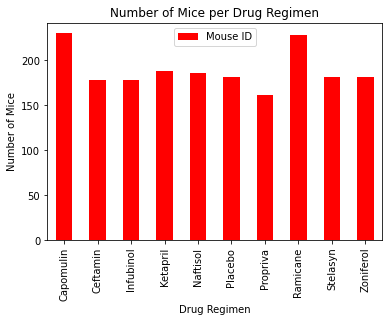

In [18]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_drug = combined_df.groupby("Drug Regimen")
mice_drug_count = pd.DataFrame(mice_drug["Mouse ID"].count())

mice_drug_chart = mice_drug_count.plot(kind='bar', title='Number of Mice per Drug Regimen', color='red')
mice_drug_chart.set_xlabel("Drug Regimen")
mice_drug_chart.set_ylabel("Number of Mice")

plt.show()

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = combined_df.groupby("Sex")
sex_count = pd.DataFrame(mice_sex["Sex"].count())

sex_chart = mice_sex.plot(kind="pie", y='Sex', title="Female V. Male Mice", startangle=180,
                          autopct="%1,1f%%",shadow=True, fontsize=14, colors=["red","blue"],legend=False)
sex_chart.set_ylabel("Sex")

plt.axis("equal")
plt.show()



KeyError: 'Sex'

ValueError: unsupported format character ',' (0x2c) at index 2

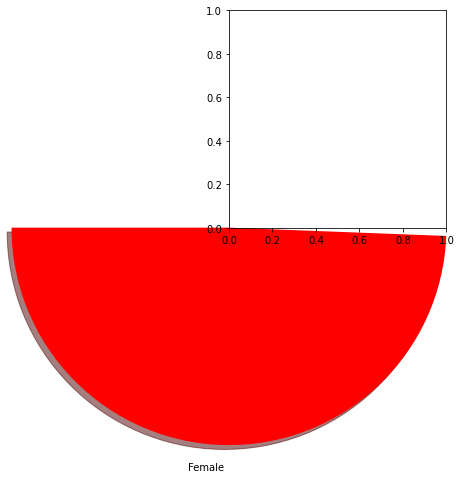

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sexes = list(sex_count.index.values)
sexes_count = sex_count["Sex"]

colors = ["red","blue"]

plt.pie(sexes_count, labels=mice_sexes, startangle=180, autopct="%1,1f%%", shadow=True, colors=colors) 
plt.rcParams["font.size"] = 14
plt.title("Female V. Male Mice") 
plt.ylabel("Sex")
plt.axis("equal")
plt.show()




## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
